# Lab 1: Univariate Data Analysis

### I. Unvariable statistics

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y1 = np.array([0.2, 0.1, 0.2, 0.9, -0.3, -0.1, -0.9, 0.2, 0.7, -0.3])
y2 = np.array([0.5, -0.4, -0.1, 0.8, 0.3, -0.2, -0.1, 0.5, -0.7, 0.4])
y3 = np.array(['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C'])

##### 1. Aproximate y1 distribution using a histogram using 4 bins in [-1, 1]


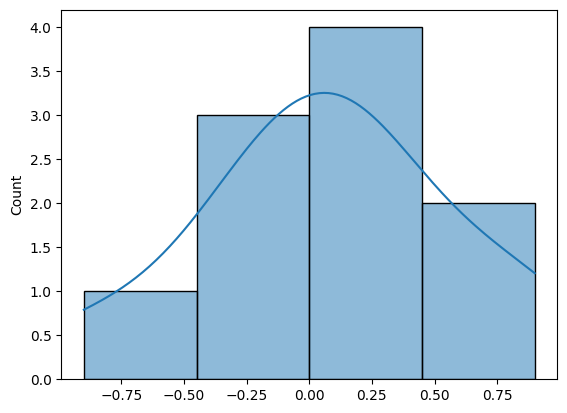

In [131]:
sns.histplot(y1, bins=4, kde=True)
plt.show()

##### 2. Compute the boxplot of y1 variable. Are there any outliers?

[-0.25  0.15  0.2 ]


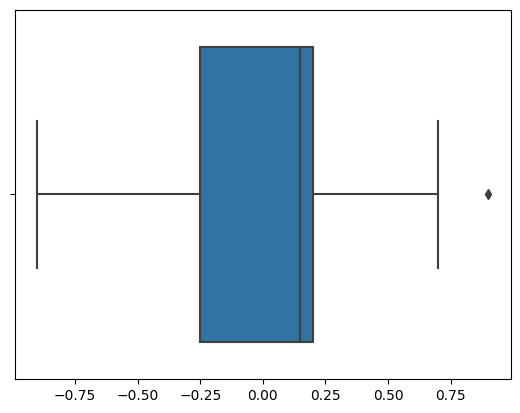

In [132]:
print(np.quantile(y1, [0.25, 0.5, 0.75]))
sns.boxplot(x = y1, whis=1.5)
plt.show()

##### 3. Are y1 and y2 variables correlated? Compare Pearson and Spearman coefficients.

In [133]:
# pearson
df = pd.DataFrame(list(zip(y1, y2)), columns=['y1', 'y2'])
df.corr(method='pearson')

,y1,y2
y1,1.000000,0.091651
y2,0.091651,1.000000


In [134]:
# speraman
df.corr(method='spearman')

,y1,y2
y1,1.000000,0.198151
y2,0.198151,1.000000


##### 4. Identify the probability mass function of y3.

In [135]:
#P(y3 = A) = 3/10
#P(y3 = B) = 3/10
#P(y3 = C) = 4/10
print(pd.Series(y3).value_counts(normalize=True))

C    0.4
A    0.3
B    0.3
dtype: float64


##### 5. Assume y3 class conditional distributions of y2 follow a Gaussian distribution

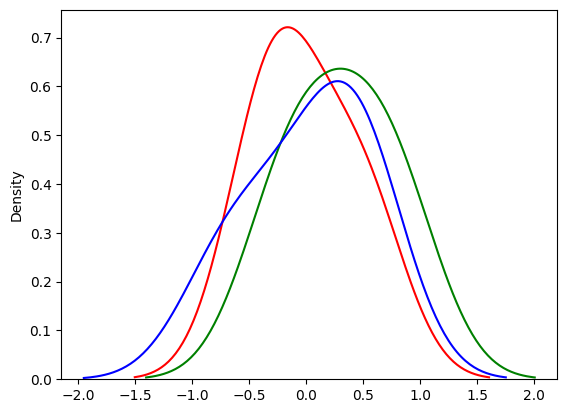

In [136]:
# a) Identify their parameters and plot by hand the distributions.

from statistics import mean


ycondA = [y2[i] for i in range(len(y2)) if y3[i] == 'A']
ycondB = [y2[i] for i in range(len(y2)) if y3[i] == 'B']
ycondC = [y2[i] for i in range(len(y2)) if y3[i] == 'C']

fig = sns.kdeplot(ycondA, color='r')
fig = sns.kdeplot(ycondB, color='g')
fig = sns.kdeplot(ycondC, color='b')
plt.show()


### II. Data preprocessing

In [137]:
y1 = [.2, .1, .2, .9, -.3, -.1]
y2 = [.5, -.4, .6, .8, .3, -.2]
y3 = ['A', 'A', 'A', 'B', 'B', 'B']
y4 = ['A', 'A', 'B', 'B', 'B', 'B']
yout = ['A', 'A', 'C', 'C', 'B', 'B']
df = pd.DataFrame(list(zip(y1, y2, y3, y4, yout)), columns=['y1', 'y2', 'y3', 'y4', 'yout'])
df

,y1,y2,y3,y4,yout
0,0.2,0.5,A,A,A
1,0.1,-0.4,A,A,A
2,0.2,0.6,A,B,C
3,0.9,0.8,B,B,C
4,-0.3,0.3,B,B,B
5,-0.1,-0.2,B,B,B


##### 6. On unsupervised feature importance:

In [138]:
import statistics as stat
# a) Considering variability, which numeric variable is less relevant?
print(stat.variance(df['y1']))
print(stat.variance(df['y2']))
# y1 is less relevant

0.16666666666666669
0.22266666666666668


In [139]:
from scipy.stats import entropy
# b) Considering entropy, which nominal variable is less relevant?
# y4 is less relevant

##### 7. On supervised feature importance:

In [140]:
# a) According to Spearman, which numeric variable is less relevant?

# turn categorical to numerical -- TODO perguntar se posso ou usar get_dummies
df['yout'].replace(['A', 'B', 'C'], [0, 1, 2], inplace=True)
df['y3'].replace(['A', 'B', 'C'], [0, 1, 2], inplace=True)
df['y4'].replace(['A', 'B', 'C'], [0, 1, 2], inplace=True)
crrs = df[['y1', 'y2', 'yout']].corr(method='spearman')
print(crrs[['yout']])
df

          yout
y1    0.363803
y2    0.717137
yout  1.000000


,y1,y2,y3,y4,yout
0,0.2,0.5,0,0,0
1,0.1,-0.4,0,0,0
2,0.2,0.6,0,1,2
3,0.9,0.8,1,1,2
4,-0.3,0.3,1,1,1
5,-0.1,-0.2,1,1,1


In [141]:
# b) According to information gain, which nominal variable is less relevant?
# TODO - VER
# list of P(yout|y)
cond_y3A = [yout[i] for i in range(len(yout)) if y3[i] == 'A']
cond_y3B = [yout[i] for i in range(len(yout)) if y3[i] == 'B']
cond_y3C = [yout[i] for i in range(len(yout)) if y3[i] == 'C']

cond_y4A = [yout[i] for i in range(len(yout)) if y4[i] == 'A']
cond_y4B = [yout[i] for i in range(len(yout)) if y4[i] == 'B']
cond_y4C = [yout[i] for i in range(len(yout)) if y4[i] == 'C']

def H(feature):
    temp = pd.Series(feature, dtype=pd.StringDtype())
    #print(temp)
    probs = temp.value_counts(normalize=True)
    #print(probs)
    entropy = -1 * np.sum(np.log2(probs) * probs)
    return entropy.round(3)
#print(H(yout))
temp = pd.Series(y3, dtype=pd.StringDtype())
y3_prob = temp.value_counts(normalize=True)
#print(y3_prob['C'])

IG_y3 = H(yout) - (y3_prob['A']*H(cond_y3A) + y3_prob['B']*H(cond_y3B) \
    + 0*H(cond_y3C))

IG_y4 = H(yout) - (H(cond_y4A) + H(cond_y4B) + H(cond_y4C))
print(IG_y3, IG_y4)


0.6669999999999999 0.585


##### 8. Normalize 𝑦2 using min-max scaling and standardization. Compare the results

In [142]:
from sklearn import preprocessing
# min max scaling
min_max_scaler = preprocessing.MinMaxScaler()
standartization = preprocessing.StandardScaler()

X_train_minimax = min_max_scaler.fit_transform(df[['y2']])
X2_train_minimax = standartization.fit_transform(df[['y2']])

print(X_train_minimax)
print(X2_train_minimax)

[[0.75      ]
 [0.        ]
 [0.83333333]
 [1.        ]
 [0.58333333]
 [0.16666667]]
[[ 0.54167626]
 [-1.54764647]
 [ 0.77382323]
 [ 1.23811717]
 [ 0.07738232]
 [-1.08335253]]


##### 9. Binarize 𝑦1 considering

In [143]:
from sklearn.preprocessing import KBinsDiscretizer
# a) equal-width/range discretization
# TODO - qual o metodo
est = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')
est.fit(df[['y1']])
Xt = est.transform(df[['y1']])
Xt


array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

## Programming Quest

##### 10. Given the breast.w.arff dataset and the provided Jupyter notebook on Data Exploration, explore the dataset and rank input variables according to their information gain (mutual_info_classif).

In [144]:
from scipy.io.arff import loadarff
from sklearn.feature_selection import mutual_info_classif, SelectKBest
# Reading the ARFF file
data = loadarff('breast.w.arff')
df = pd.DataFrame(data[0])
df['Class'] = df['Class'].str.decode('utf-8')
print(df.shape)
# remove null rows
df.dropna(inplace=True)
#print(df.isnull().sum())
print(df.shape)

(699, 10)
(683, 10)


In [145]:
# separate var input form var output
Data = df.drop(columns = 'Class').values
target = df['Class']
# preprocessing
Data = preprocessing.MinMaxScaler().fit_transform(Data)
target = preprocessing.LabelEncoder().fit_transform(target)


In [146]:
# select best features according to mutual info classif
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=9)
fs_fit_mutual_info.fit_transform(Data, target)

# sort and get rank
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:9]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['Cell_Size_Uniformity', 'Cell_Shape_Uniformity', 'Bare_Nuclei',
       'Bland_Chromatin', 'Single_Epi_Cell_Size', 'Normal_Nucleoli',
       'Clump_Thickness', 'Marginal_Adhesion', 'Mitoses'], dtype=object)

In [147]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.48613672, 0.46859798, 0.4207385 , 0.383086  , 0.37052465,
       0.34369378, 0.32746402, 0.31847787, 0.12490832])

In [148]:
def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

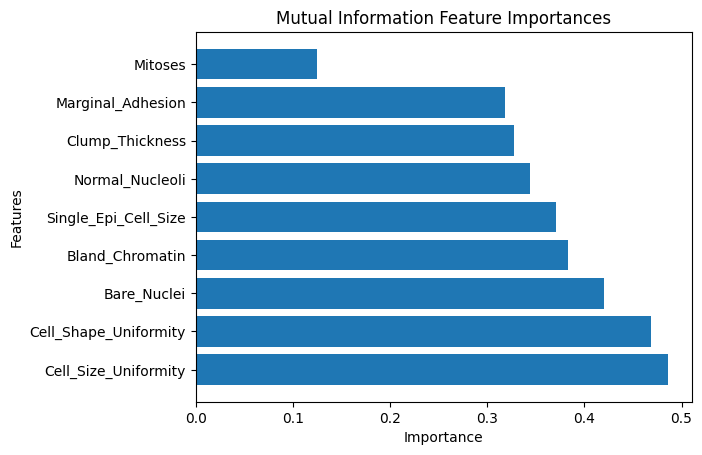

In [149]:
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information')